# Advanced Lane Finding Project

## Project Objective

Develop an image processing pipeline that can identify lane lines, measure the radius of the curve(if any), identify the center of the lane, determine how far off-center the vehicle is currently driving, and clearly label identfied lines and lane space.

Image processing pipeline

Undistort - Camera lenses introduce distortion into captured images as a consequence of having increased field of view. In order to undistort 

Warp

Isolate Lanes

Curve Fit

Final Image

Blah blah blah







In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import interact, interactive, fixed
import os

%matplotlib inline

test = os.getcwd()
print(test)

C:\Users\Maxwell\Udacity Repos\CarND-Advanced-Lane-Finding


In [2]:
#Calibration

img = mpimg.imread('test_images/test2.jpg')

images = [cv2.imread(file) for file in glob.glob("camera_cal/*.jpg")]
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)
objpoints = []
imgpoints = []

# prepare object points
nx = 9
ny = 6

# Make a list of calibration images
#fname = 'calibration2.png'
#img = cv2.imread(fname)

for image in images:
    #img = cv2.imread(fname)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
    if ret == True:
        # Draw and display the corners
        objpoints.append(objp)
        imgpoints.append(corners)
        # Draw and display the corners
        cv2.drawChessboardCorners(image, (9,6), corners, ret)
     
        cv2.imshow('img', image)
        cv2.waitKey(50)
cv2.destroyAllWindows()

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)


True

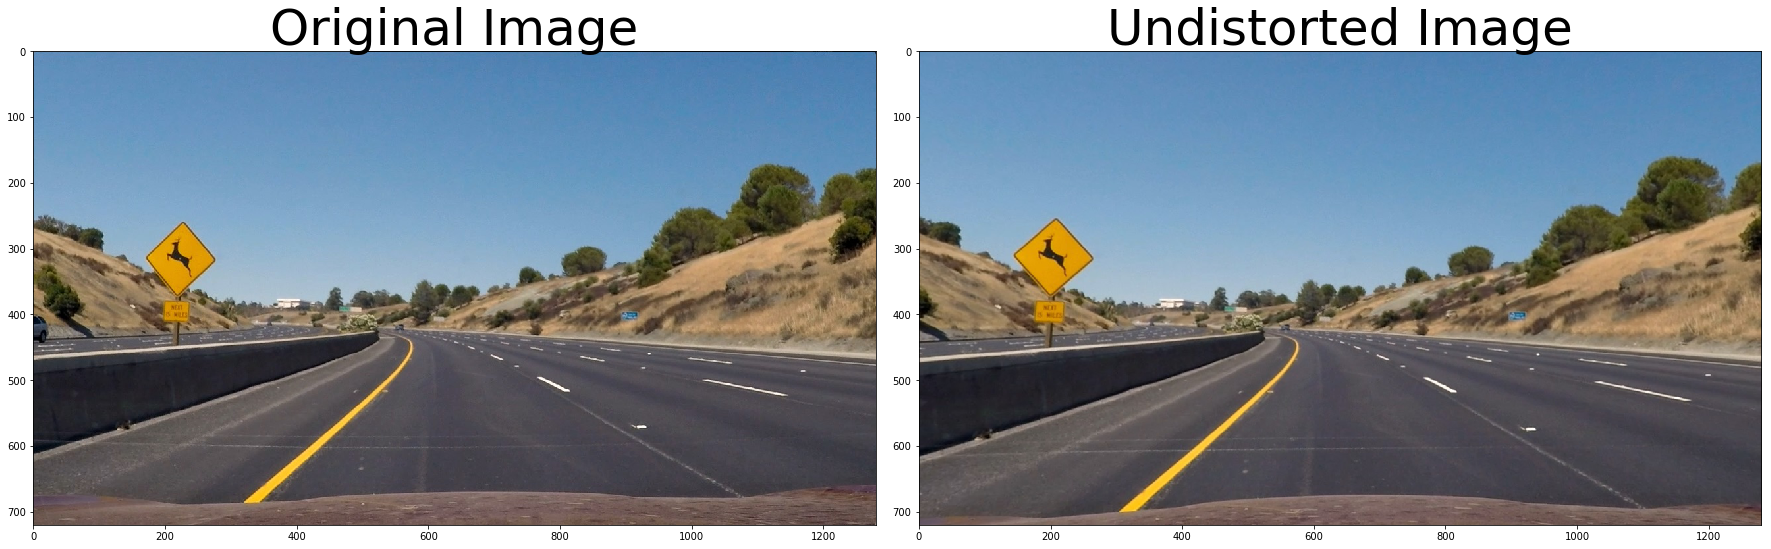

In [3]:
undistorted = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

cv2.imwrite('UndistortedImage-test2.jpg',undistorted)

In [50]:

def process_image(image):
    
    result = cv2.undistort(image, mtx, dist, None, mtx)
        
    return result

from moviepy.editor import VideoFileClip
from IPython.display import HTML

undistorted = 'undistorted.mp4'

clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(undistorted, audio=False)

white_clip.reader.close()
white_clip.audio.reader.close_proc()

[MoviePy] >>>> Building video undistorted.mp4
[MoviePy] Writing video undistorted.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [00:44<00:00, 28.46it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: undistorted.mp4 

Wall time: 44.7 s


In [ ]:
#get lens calibration values
#slice video into images
#apply lens calibration to video images
#warp video images so they display an overhead view
#Figure out what colorspace I want to used to detect lane lines(simplecv tool could be useful here)
#Take colorspace shifted images and use rectangle histogram method to identfy location of lane lines
#Shift rectangle upwards and repeat until completed for the whole image
#take lane line locations and generate a polyfit curve that best fits through their centers
#Draw the polyfit line in yellow
#Draw a rectange the space between the lines in grew
#calculate the center of the lane
#calculate the distance of the vehicle from center
#calculate the radius of the curve
#dewarp the resultant image with identified lane lines
#display the calculated radius, centerm and distance from center
#Repeat for all images
#Recreate video from processed images

# Change Image colorspace

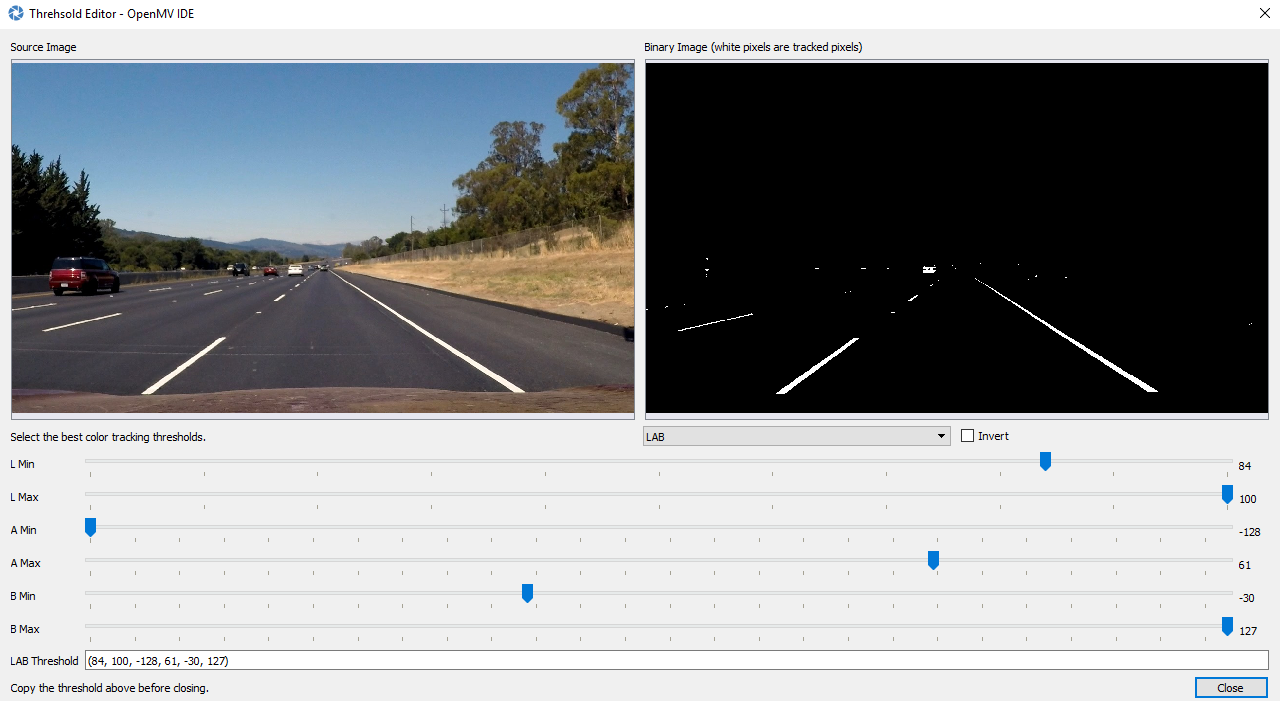

In [5]:
def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
    return binary_output

def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Return the result
    return binary_output

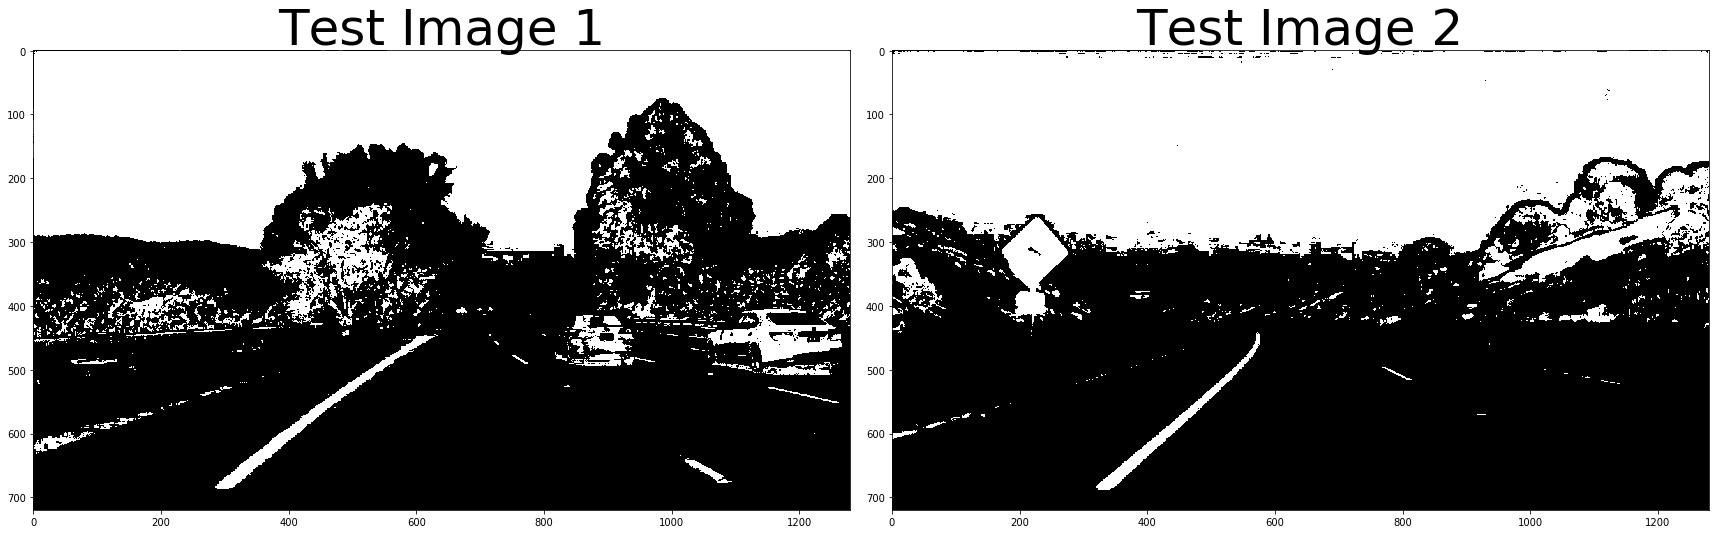

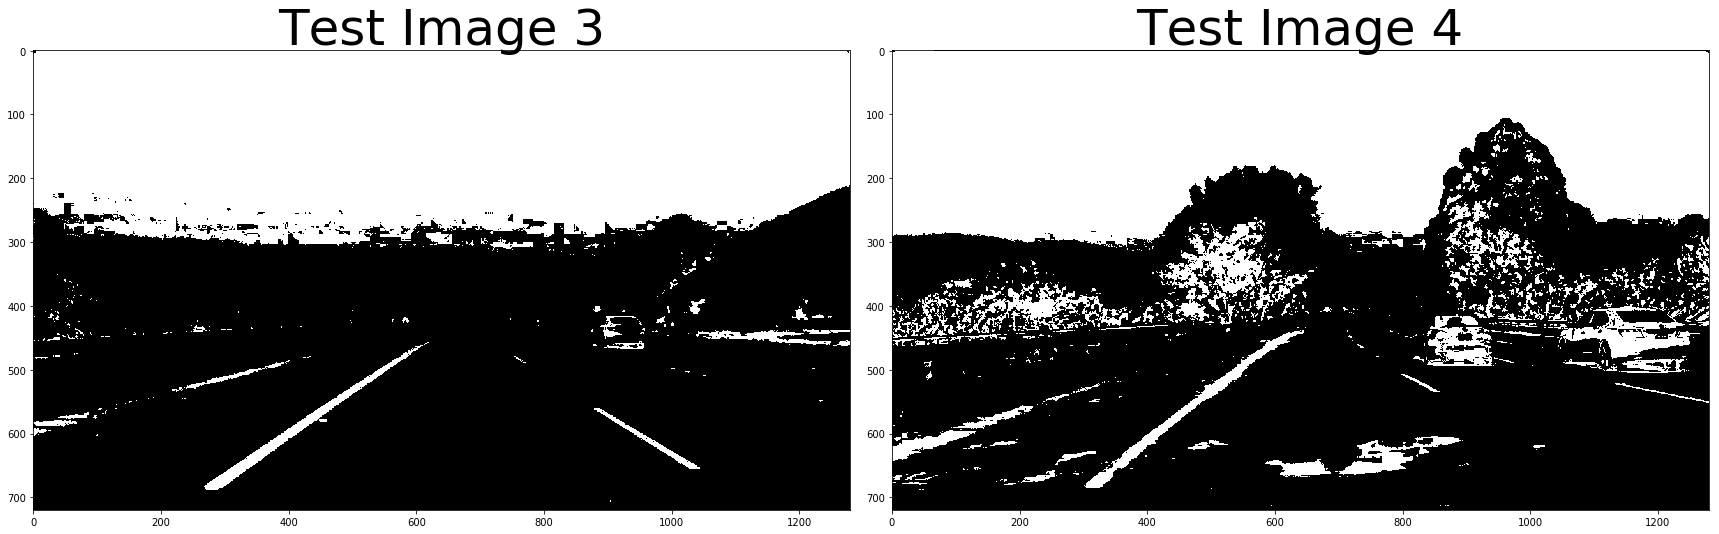

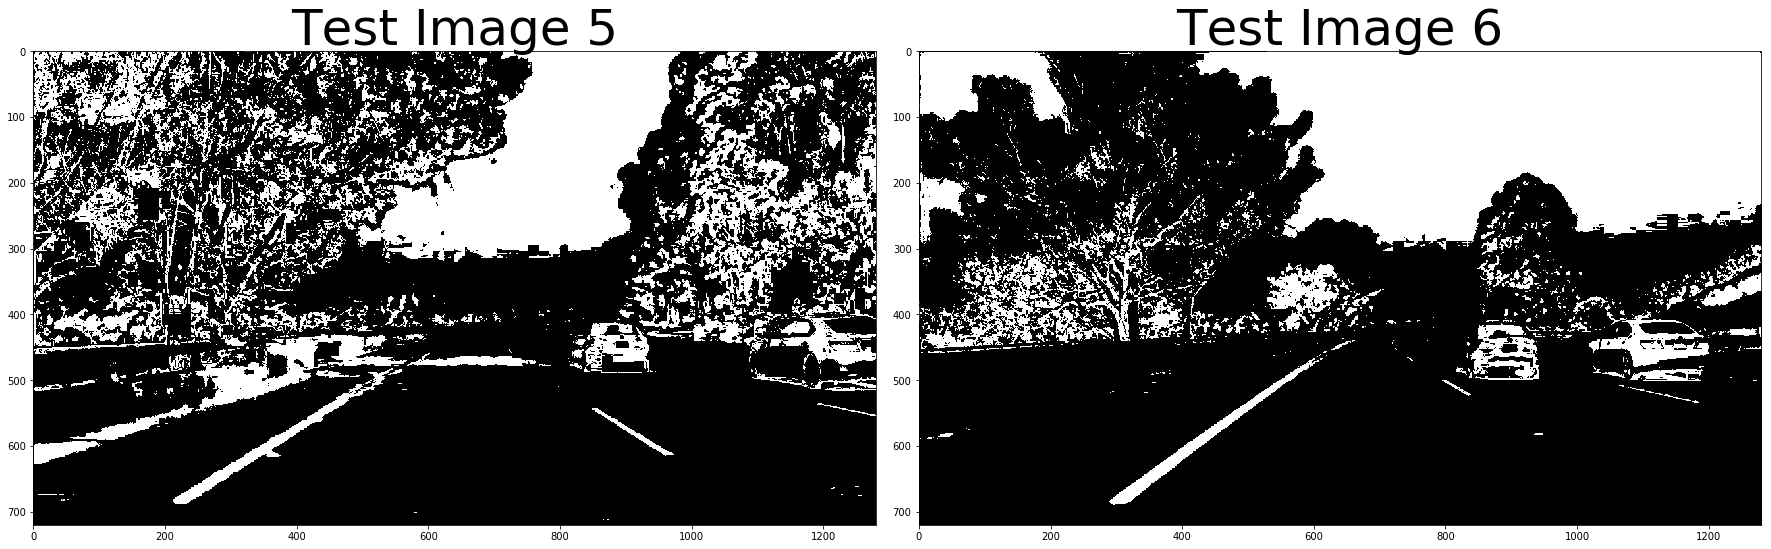

In [48]:
img1 = mpimg.imread('test_images/test1.jpg')
img2 = mpimg.imread('test_images/test2.jpg')
img3 = mpimg.imread('test_images/test3.jpg')
img4 = mpimg.imread('test_images/test4.jpg')
img5 = mpimg.imread('test_images/test5.jpg')
img6 = mpimg.imread('test_images/test6.jpg')



hls_binary1 = hls_select(img1, thresh=(91, 255))
hls_binary2 = hls_select(img2, thresh=(91, 255))
hls_binary3 = hls_select(img3, thresh=(91, 255))
hls_binary4 = hls_select(img4, thresh=(91, 255))
hls_binary5 = hls_select(img5, thresh=(91, 255))
hls_binary6 = hls_select(img6, thresh=(91, 255))


f1, (x1, x2) = plt.subplots(1, 2, figsize=(24, 9))
f1.tight_layout()
x1.imshow(hls_binary1, cmap='gray')
x1.set_title('Test Image 1', fontsize=50)
x2.imshow(hls_binary2, cmap='gray')
x2.set_title('Test Image 2', fontsize=50)
f2, (x3, x4) = plt.subplots(1, 2, figsize=(24, 9))
f2.tight_layout()
x3.imshow(hls_binary3, cmap='gray')
x3.set_title('Test Image 3', fontsize=50)
x4.imshow(hls_binary4, cmap='gray')
x4.set_title('Test Image 4', fontsize=50)
f3, (x5, x6) = plt.subplots(1, 2, figsize=(24, 9))
f3.tight_layout()
x5.imshow(hls_binary5, cmap='gray')
x5.set_title('Test Image 5', fontsize=50)
x6.imshow(hls_binary6, cmap='gray')
x6.set_title('Test Image 6', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


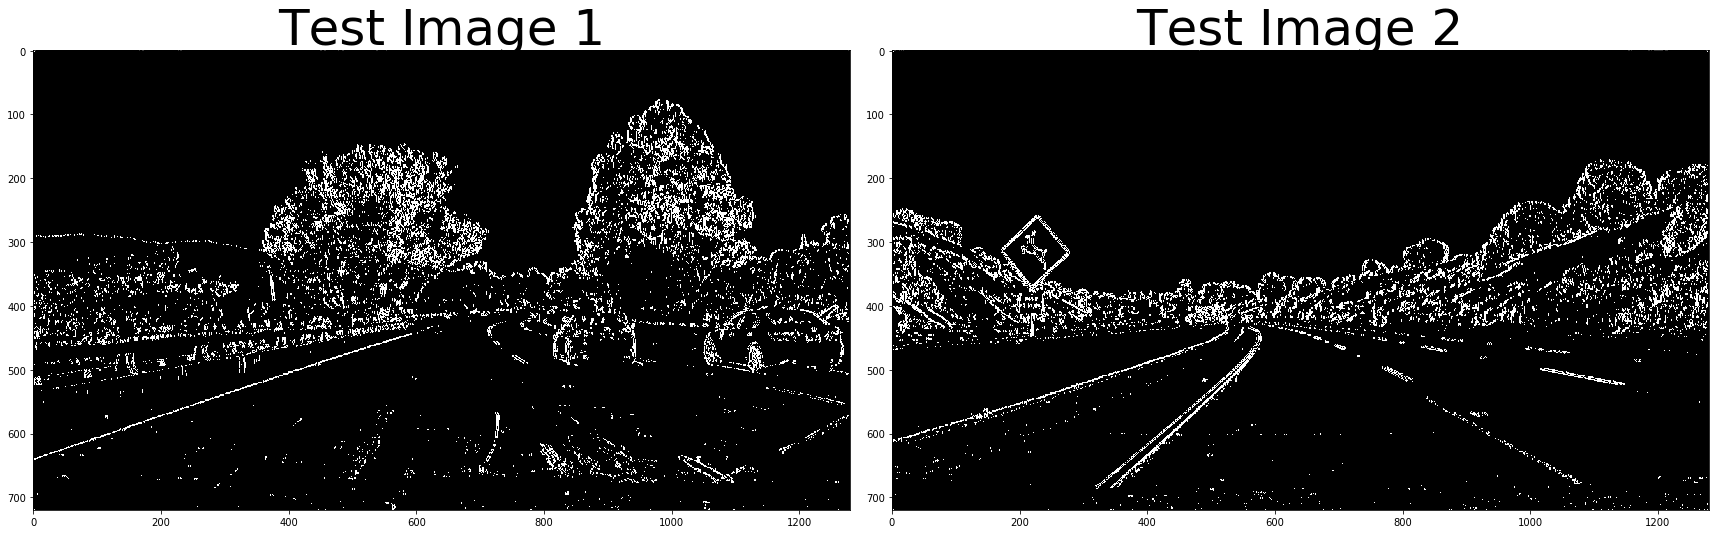

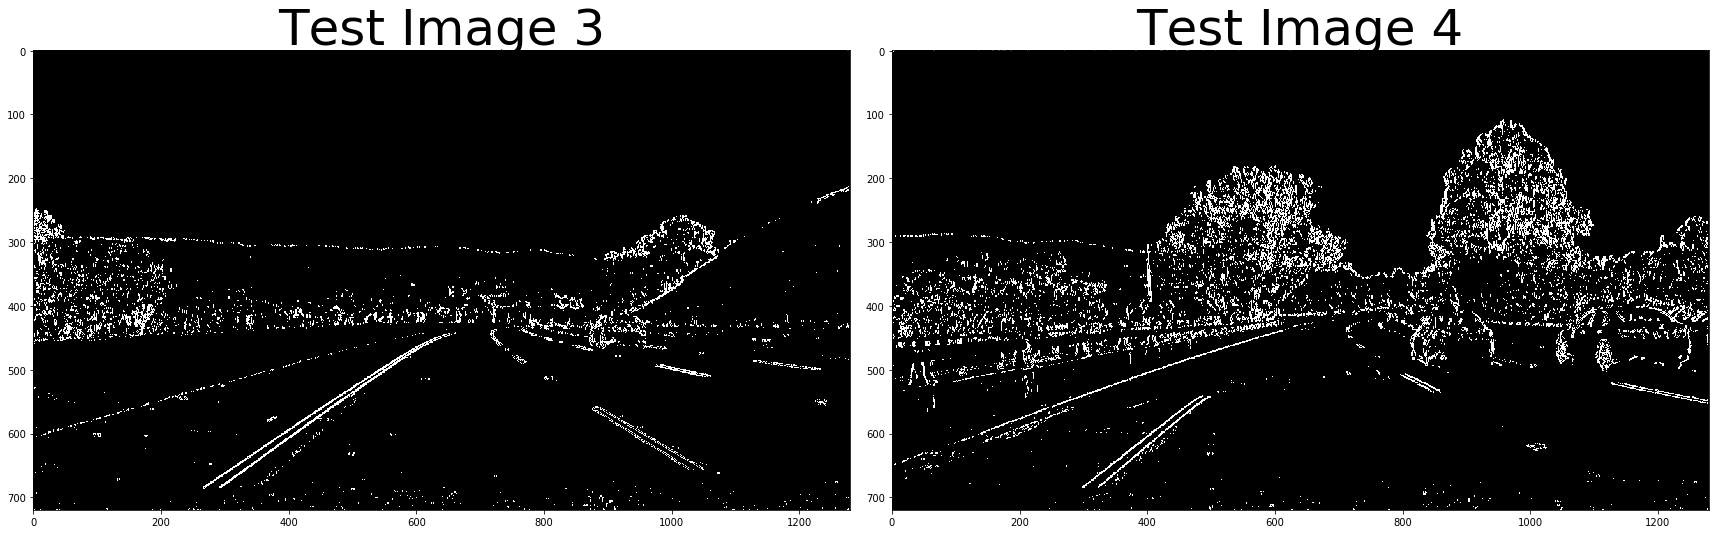

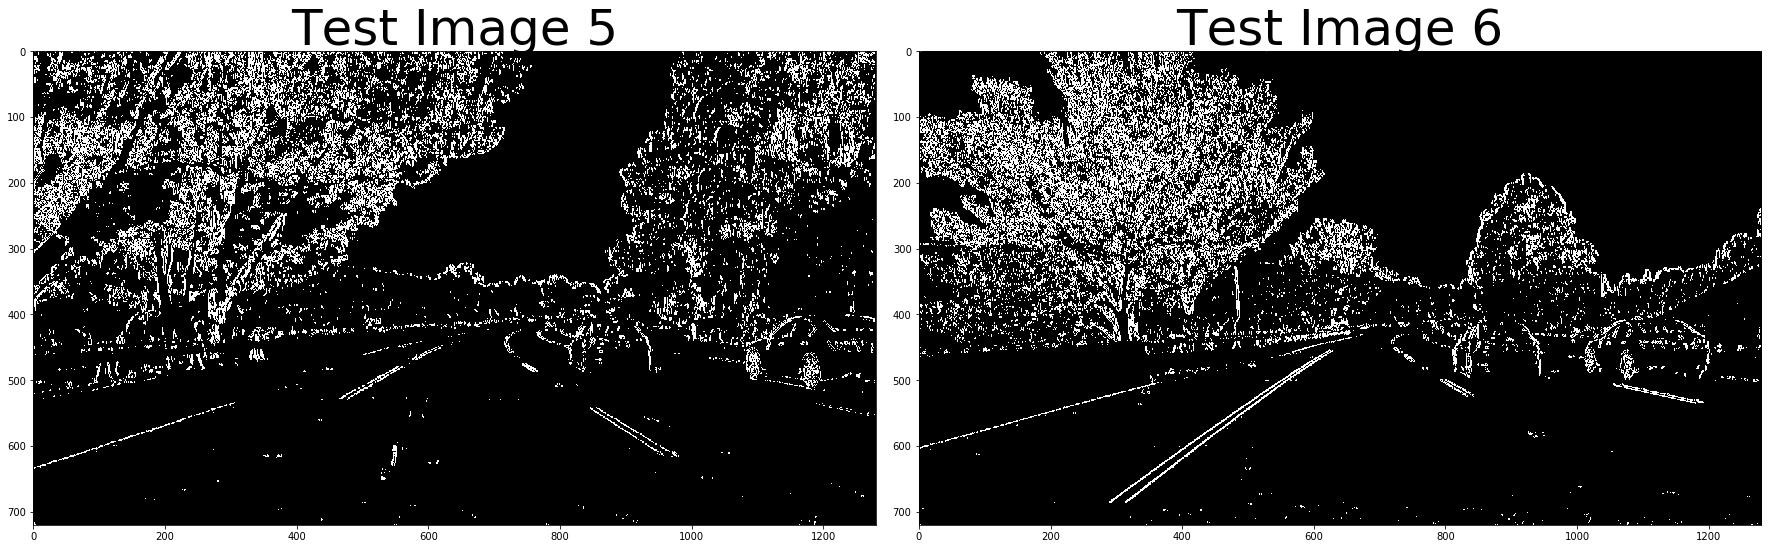

In [7]:
img1 = mpimg.imread('test_images/test1.jpg')
img2 = mpimg.imread('test_images/test2.jpg')
img3 = mpimg.imread('test_images/test3.jpg')
img4 = mpimg.imread('test_images/test4.jpg')
img5 = mpimg.imread('test_images/test5.jpg')
img6 = mpimg.imread('test_images/test6.jpg')



grad_binary1 = abs_sobel_thresh(img1, orient='x', thresh_min=20, thresh_max=100)
grad_binary2 = abs_sobel_thresh(img2, orient='x', thresh_min=20, thresh_max=100)
grad_binary3 = abs_sobel_thresh(img3, orient='x', thresh_min=20, thresh_max=100)
grad_binary4 = abs_sobel_thresh(img4, orient='x', thresh_min=20, thresh_max=100)
grad_binary5 = abs_sobel_thresh(img5, orient='x', thresh_min=20, thresh_max=100)
grad_binary6 = abs_sobel_thresh(img6, orient='x', thresh_min=20, thresh_max=100)


f1, (x1, x2) = plt.subplots(1, 2, figsize=(24, 9))
f1.tight_layout()
x1.imshow(grad_binary1, cmap='gray')
x1.set_title('Test Image 1', fontsize=50)
x2.imshow(grad_binary2, cmap='gray')
x2.set_title('Test Image 2', fontsize=50)
f2, (x3, x4) = plt.subplots(1, 2, figsize=(24, 9))
f2.tight_layout()
x3.imshow(grad_binary3, cmap='gray')
x3.set_title('Test Image 3', fontsize=50)
x4.imshow(grad_binary4, cmap='gray')
x4.set_title('Test Image 4', fontsize=50)
f3, (x5, x6) = plt.subplots(1, 2, figsize=(24, 9))
f3.tight_layout()
x5.imshow(grad_binary5, cmap='gray')
x5.set_title('Test Image 5', fontsize=50)
x6.imshow(grad_binary6, cmap='gray')
x6.set_title('Test Image 6', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

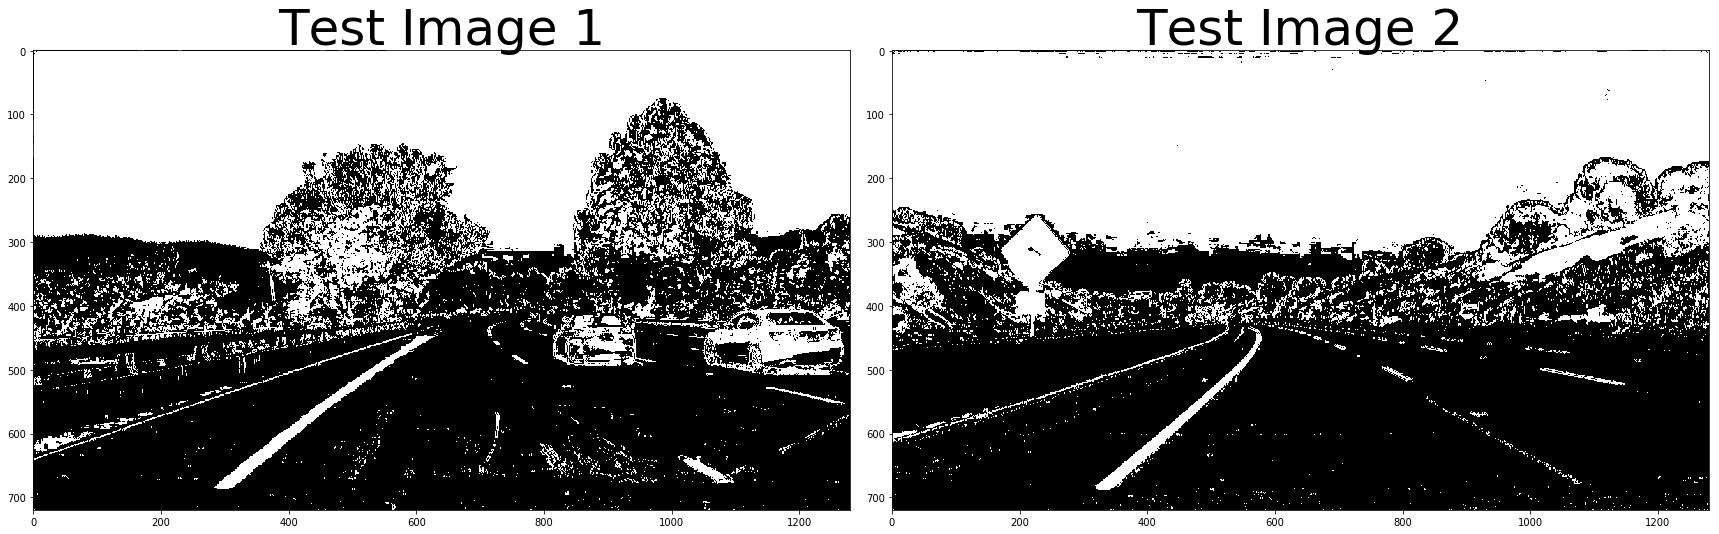

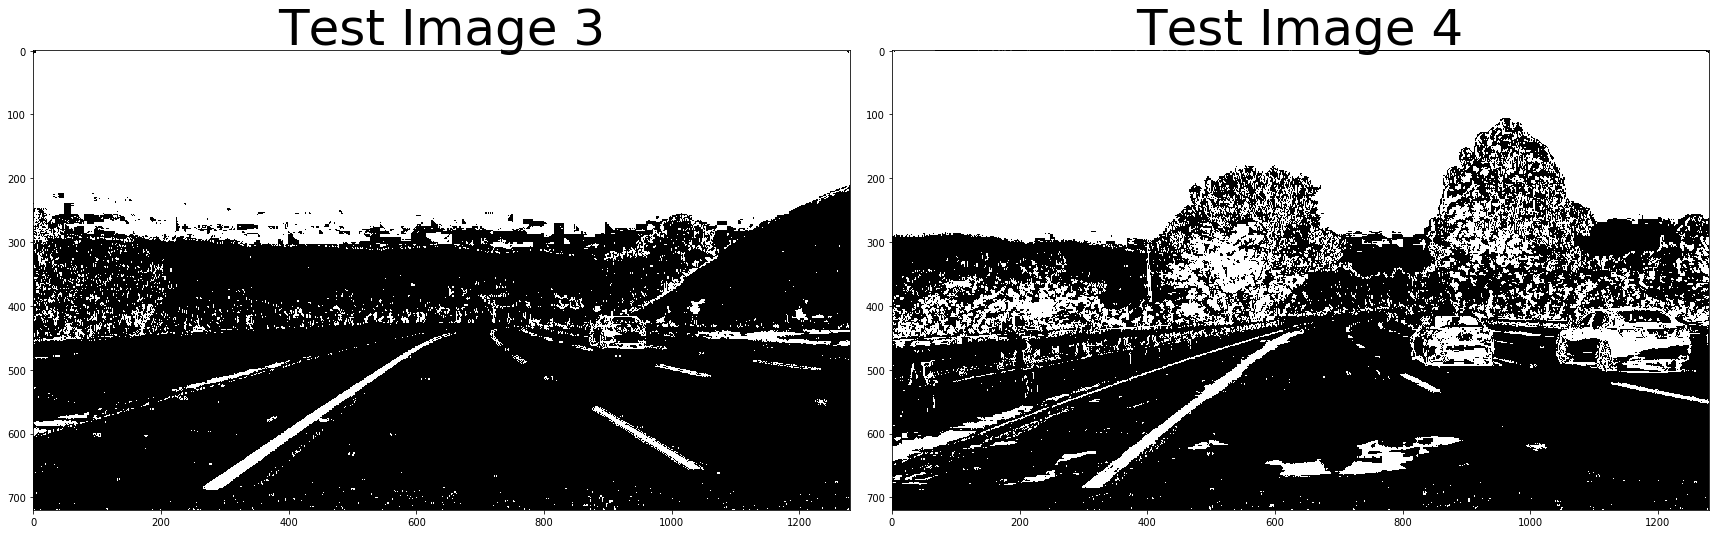

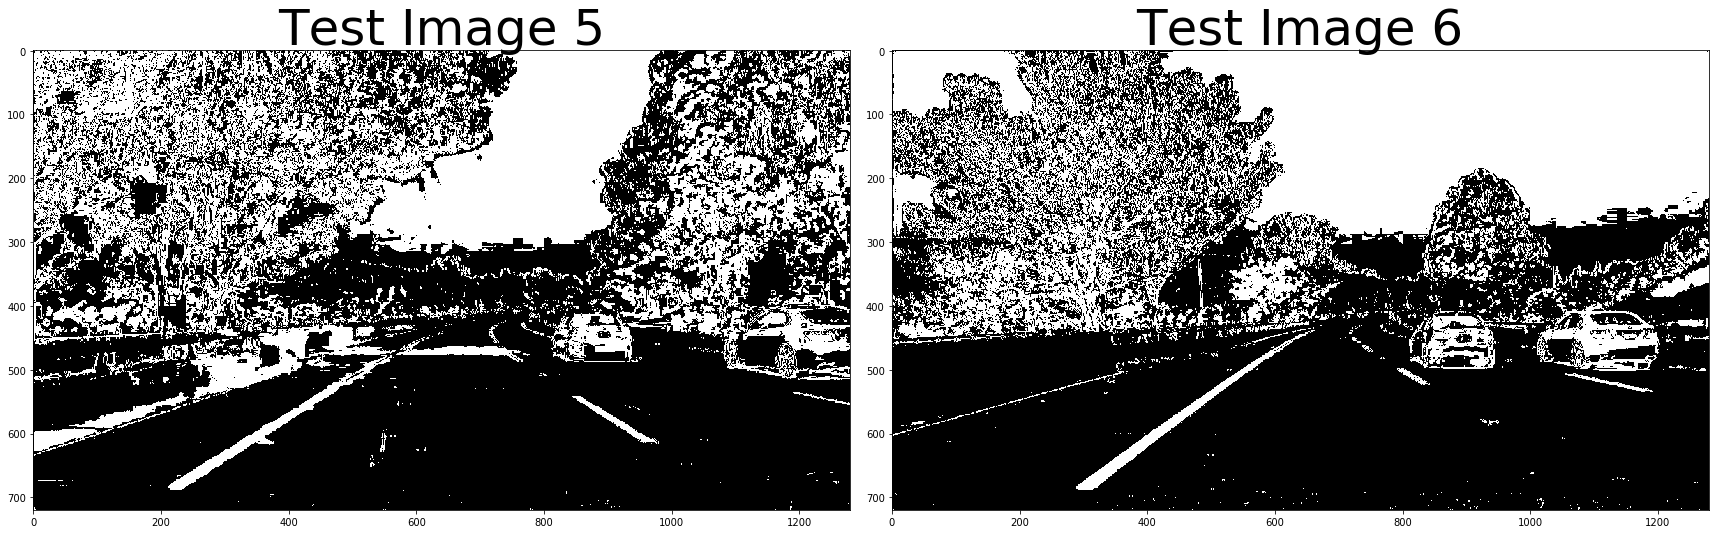

In [22]:
or_image1 = cv2.bitwise_or(hls_binary1, grad_binary1)
or_image2 = cv2.bitwise_or(hls_binary2, grad_binary2)
or_image3 = cv2.bitwise_or(hls_binary3, grad_binary3)
or_image4 = cv2.bitwise_or(hls_binary4, grad_binary4)
or_image5 = cv2.bitwise_or(hls_binary5, grad_binary5)
or_image6 = cv2.bitwise_or(hls_binary6, grad_binary6)

f1, (x1, x2) = plt.subplots(1, 2, figsize=(24, 9))
f1.tight_layout()
x1.imshow(or_image1, cmap='gray')
x1.set_title('Test Image 1', fontsize=50)
x2.imshow(or_image2, cmap='gray')
x2.set_title('Test Image 2', fontsize=50)

f2, (x3, x4) = plt.subplots(1, 2, figsize=(24, 9))
f2.tight_layout()
x3.imshow(or_image3, cmap='gray')
x3.set_title('Test Image 3', fontsize=50)
x4.imshow(or_image4, cmap='gray')
x4.set_title('Test Image 4', fontsize=50)

f3, (x5, x6) = plt.subplots(1, 2, figsize=(24, 9))
f3.tight_layout()
x5.imshow(or_image5, cmap='gray')
x5.set_title('Test Image 5', fontsize=50)
x6.imshow(or_image6, cmap='gray')
x6.set_title('Test Image 6', fontsize=50)

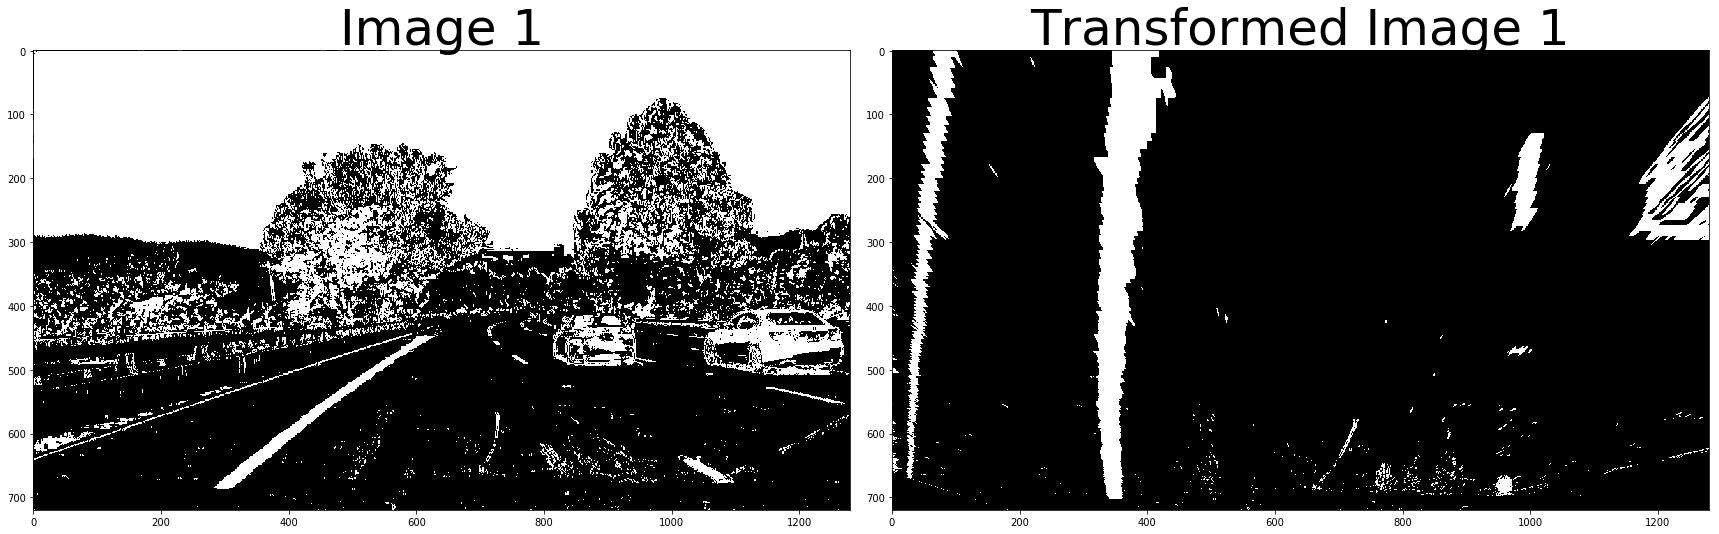

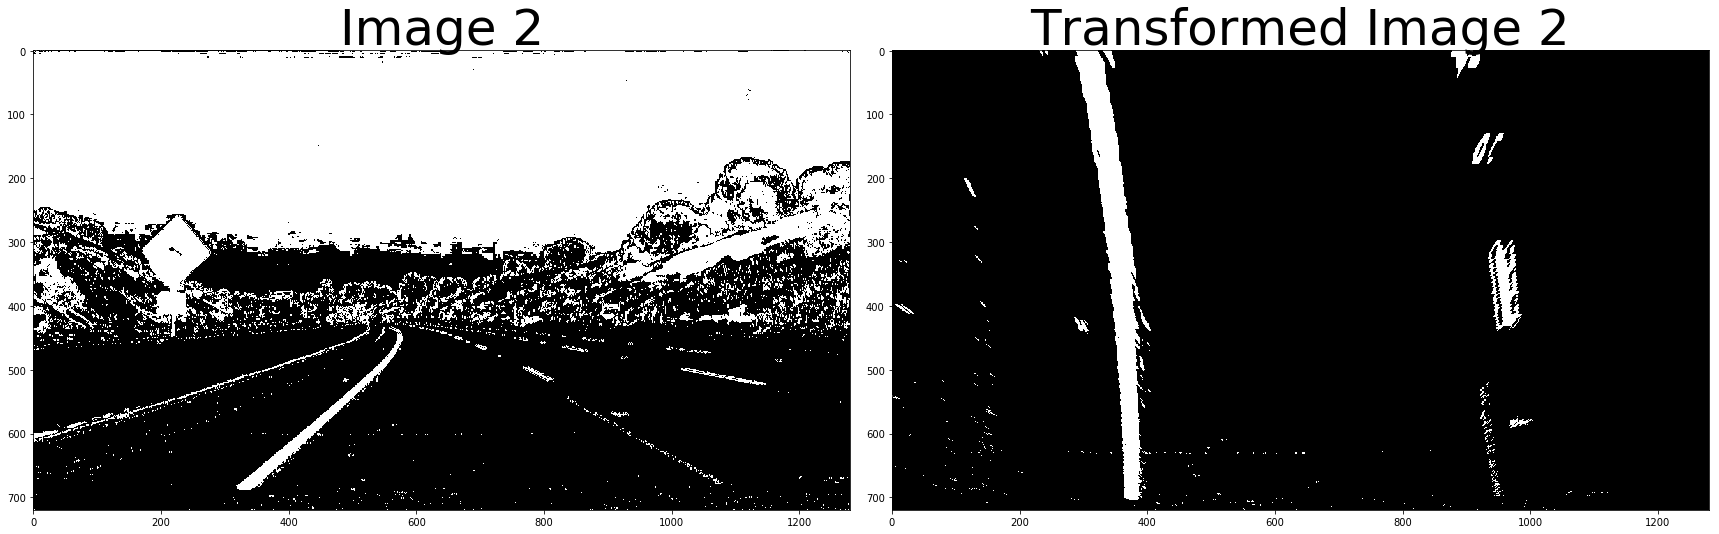

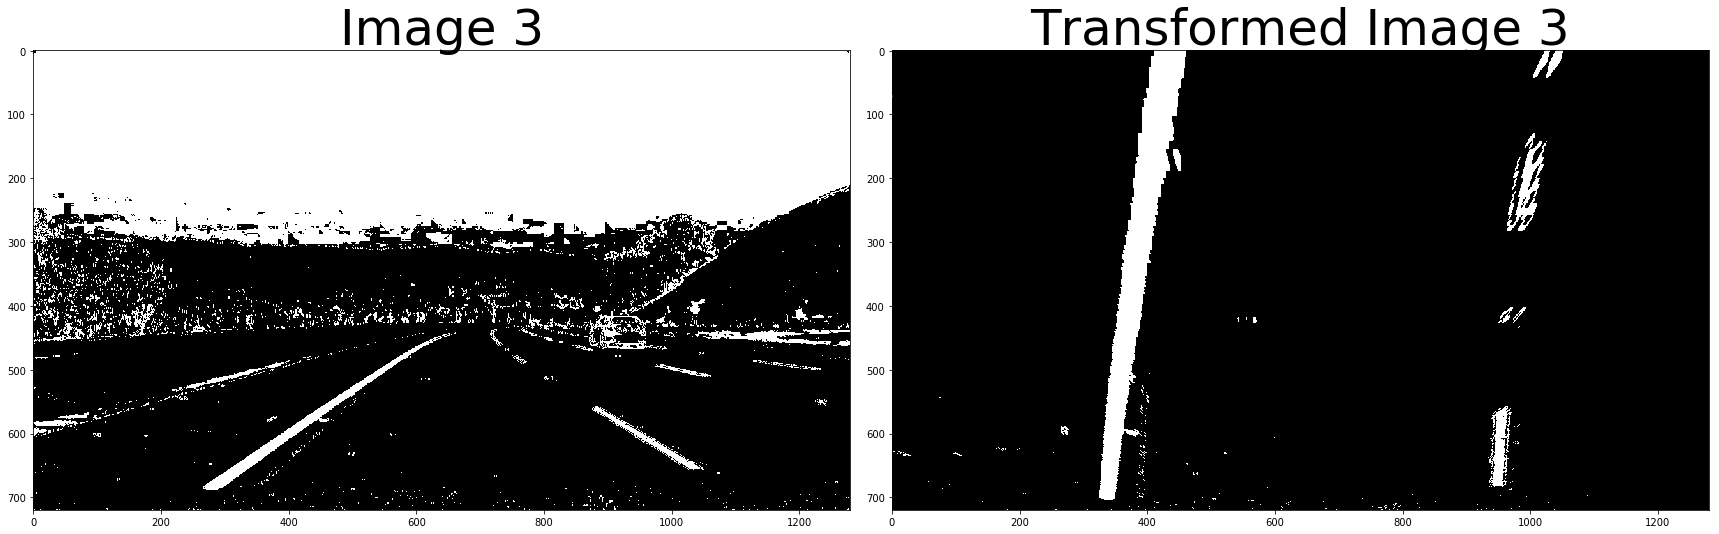

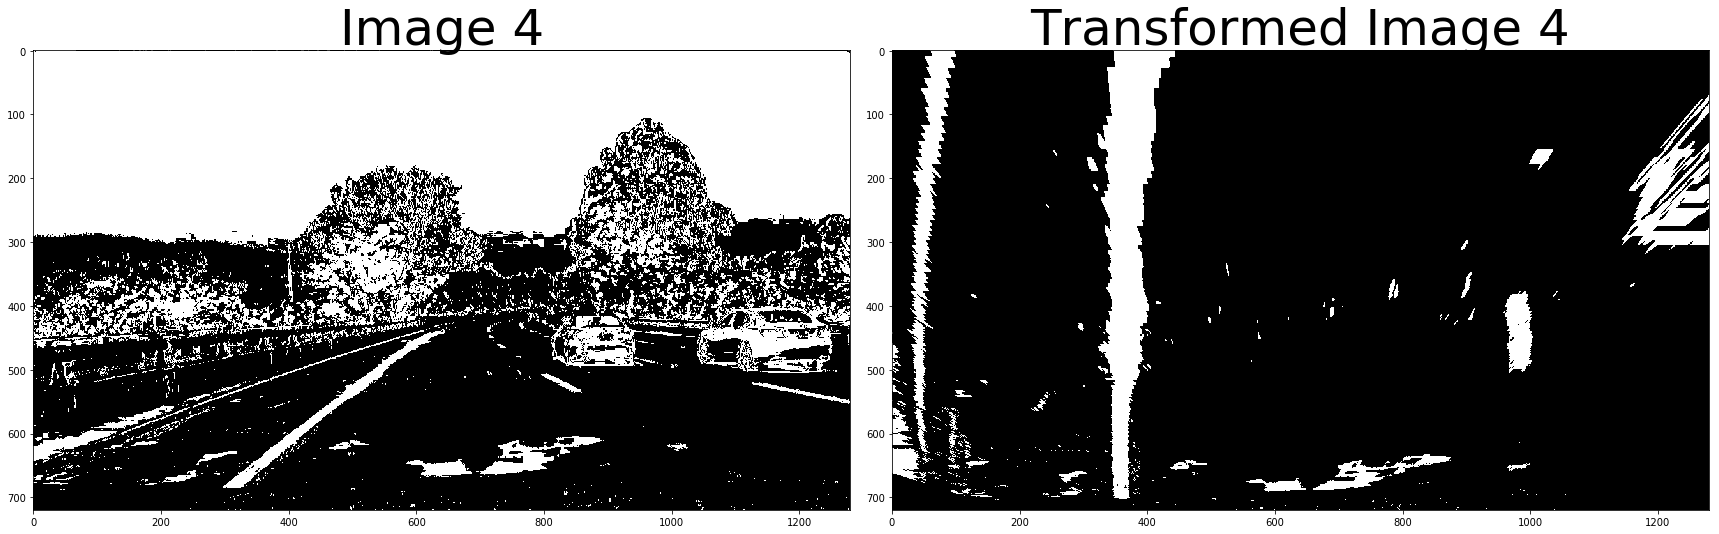

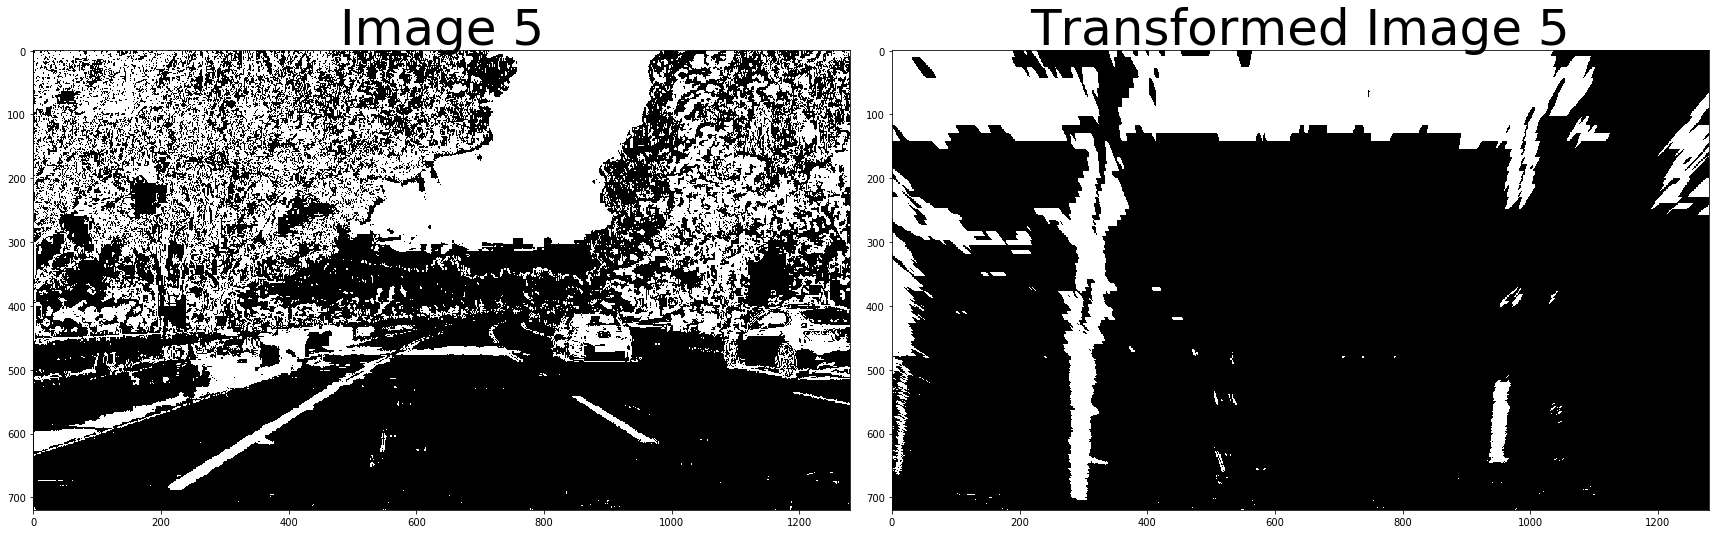

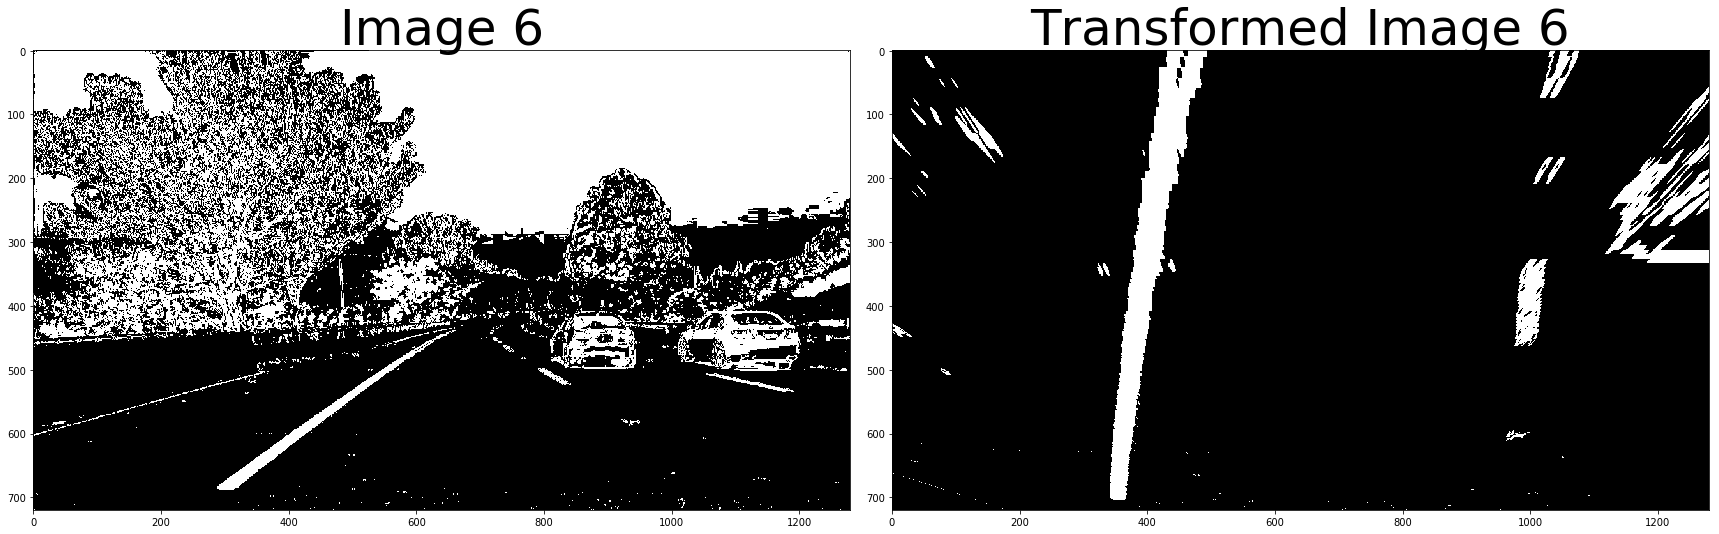

In [21]:
# Select Source Points
src_bottom_left = [222,717] 
src_bottom_right = [1083, 717]
src_top_left = [614, 437]
src_top_right = [669, 717]

source = np.float32([src_bottom_left,src_bottom_right,src_top_right,src_top_left])
source = np.float32([[570,468],  [714,468], [1106,720], [207,720]])
image_shape = (720,1280)

# Destination points are chosen such that straight lanes appear more or less parallel in the transformed image.
bottom_left = [320,720] 
bottom_right = [920, 720]
top_left = [320, 1]
top_right = [920, 1]

dst = np.float32([top_left,top_right,bottom_right, bottom_left])

M = cv2.getPerspectiveTransform(source, dst)
M_inv = cv2.getPerspectiveTransform(dst, source)
img_size = (image_shape[1], image_shape[0])

warped1 = cv2.warpPerspective(or_image1, M, img_size , flags=cv2.INTER_LINEAR)
warped2 = cv2.warpPerspective(or_image2, M, img_size , flags=cv2.INTER_LINEAR)
warped3 = cv2.warpPerspective(or_image3, M, img_size , flags=cv2.INTER_LINEAR)
warped4 = cv2.warpPerspective(or_image4, M, img_size , flags=cv2.INTER_LINEAR)
warped5 = cv2.warpPerspective(or_image5, M, img_size , flags=cv2.INTER_LINEAR)
warped6 = cv2.warpPerspective(or_image6, M, img_size , flags=cv2.INTER_LINEAR)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(or_image1, cmap='gray')
ax1.set_title('Image 1', fontsize=50)
ax2.imshow(warped1, cmap='gray')
ax2.set_title('Transformed Image 1', fontsize=50)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(or_image2, cmap='gray')
ax1.set_title('Image 2', fontsize=50)
ax2.imshow(warped2, cmap='gray')
ax2.set_title('Transformed Image 2', fontsize=50)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(or_image3, cmap='gray')
ax1.set_title('Image 3', fontsize=50)
ax2.imshow(warped3, cmap='gray')
ax2.set_title('Transformed Image 3', fontsize=50)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(or_image4, cmap='gray')
ax1.set_title('Image 4', fontsize=50)
ax2.imshow(warped4, cmap='gray')
ax2.set_title('Transformed Image 4', fontsize=50)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(or_image5, cmap='gray')
ax1.set_title('Image 5', fontsize=50)
ax2.imshow(warped5, cmap='gray')
ax2.set_title('Transformed Image 5', fontsize=50)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(or_image6, cmap='gray')
ax1.set_title('Image 6', fontsize=50)
ax2.imshow(warped6, cmap='gray')
ax2.set_title('Transformed Image 6', fontsize=50)


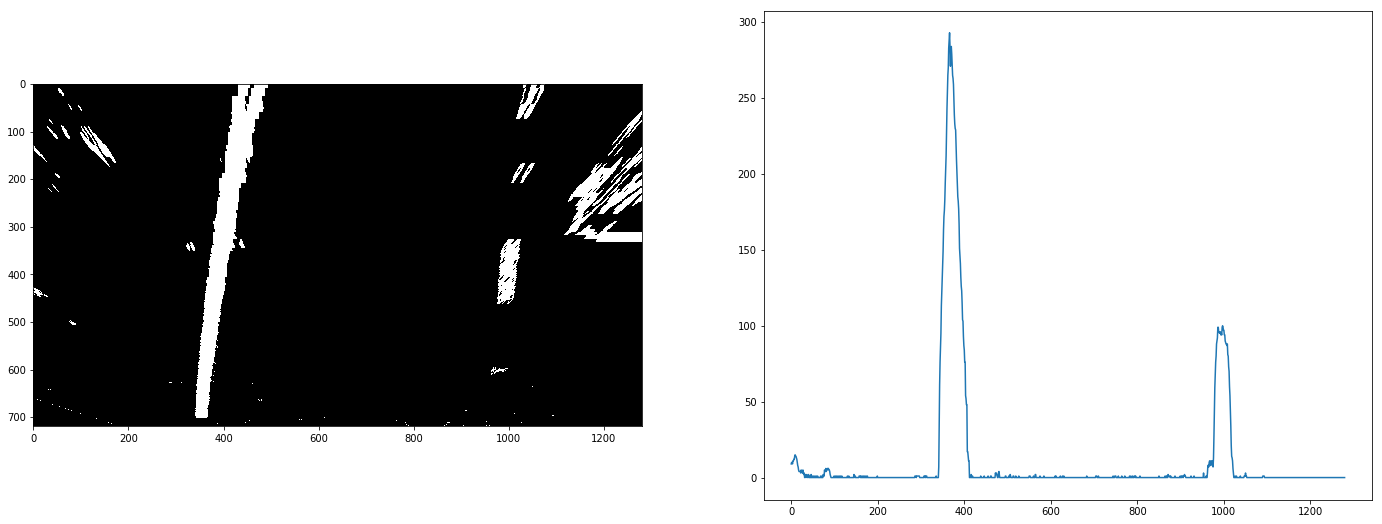

In [37]:
histogram = np.sum(warped6[warped6.shape[0]//2:,:], axis=0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))

ax1.imshow(warped6, cmap='gray')
ax2.plot(histogram)

In [41]:


def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    return out_img




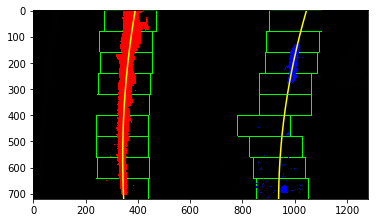

In [42]:
out_img = fit_polynomial(warped1)

plt.imshow(out_img)

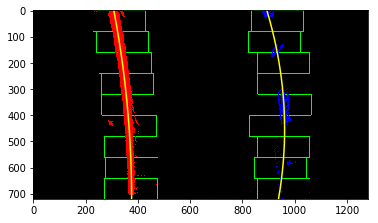

In [43]:
out_img = fit_polynomial(warped2)

plt.imshow(out_img)

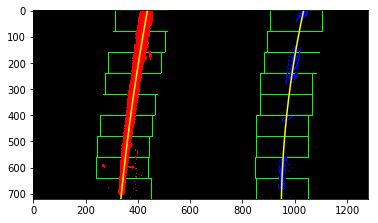

In [44]:
out_img = fit_polynomial(warped3)

plt.imshow(out_img)

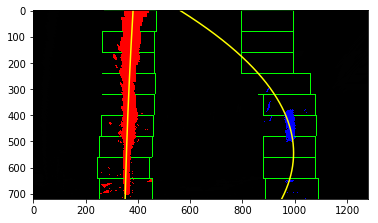

In [45]:
out_img = fit_polynomial(warped4)

plt.imshow(out_img)

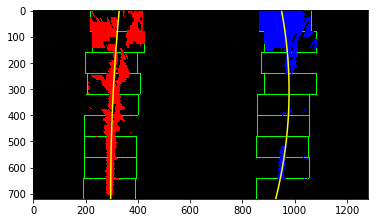

In [46]:
out_img = fit_polynomial(warped5)

plt.imshow(out_img)

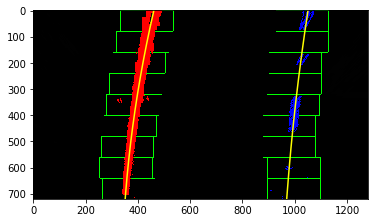

In [47]:
out_img = fit_polynomial(warped6)

plt.imshow(out_img)